Team - Ajithra, Amal, Daina, Riya

Import Necesasary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

load and read data

In [2]:
train=pd.read_csv("train_E1GspfA.csv")

In [3]:
train.head()

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


Understand the data

In [4]:
train.dtypes

date      object
hour       int64
demand     int64
dtype: object

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    18247 non-null  object
 1   hour    18247 non-null  int64 
 2   demand  18247 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 427.8+ KB


In [6]:
train.shape

(18247, 3)

In [7]:
train.duplicated().sum()

0

Extract relevant features from the given data for prediction

In [8]:
# Convert objective datatype of date to datetime format
train['date'] = pd.to_datetime(train['date'],errors = 'coerce') 

In [9]:
# decompose date variable into year, month and day
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
train['day'] = train['date'].dt.day

In [10]:
train.head()

,date,hour,demand,year,month,day
0,2018-08-18,9,91,2018,8,18
1,2018-08-18,10,21,2018,8,18
2,2018-08-18,13,23,2018,8,18
3,2018-08-18,14,104,2018,8,18
4,2018-08-18,15,81,2018,8,18


In [11]:
#Extract hour variable 
train['hour'].unique()

array([ 9, 10, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  2,  8, 11, 12,
        7,  0,  6,  1,  3,  5,  4], dtype=int64)

In [12]:
train['hour'].dtype

dtype('int64')

In [13]:
train['hour_class'] = pd.cut(train['hour'],5,labels=['Early_Morning','Morning','Noon','Evening','Night'])

In [14]:
train['hour'].unique()

array([ 9, 10, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  2,  8, 11, 12,
        7,  0,  6,  1,  3,  5,  4], dtype=int64)

In [15]:
train.head()

,date,hour,demand,year,month,day,hour_class
0,2018-08-18,9,91,2018,8,18,Morning
1,2018-08-18,10,21,2018,8,18,Noon
2,2018-08-18,13,23,2018,8,18,Noon
3,2018-08-18,14,104,2018,8,18,Evening
4,2018-08-18,15,81,2018,8,18,Evening


In [16]:
#Day convertion
train['Week'] =(train['date'].dt.isocalendar().week).astype(int)
train['Day_name'] = train['date'].dt.dayofweek
train['Day_of_Year']=train['date'].dt.dayofyear
train['Quarter'] = train['date'].dt.quarter

In [17]:
train['Week'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 18247 entries, 0 to 18246
Series name: Week
Non-Null Count  Dtype
--------------  -----
18247 non-null  int32
dtypes: int32(1)
memory usage: 71.4 KB


In [18]:
# find Time of day
def timeofday(n):
    if n in range(1,4):
        return 1
    elif n in range(4,7):
        return 2
    elif n in range(7,12):
        return 3
    elif n in range(12,15):
        return 4
    elif n in range(15,18):
        return 5
    elif n in range(18,25) or n==0:
        return 6
    else:
        return True
train['TimeofDay']=train['hour'].apply(lambda n:timeofday(n))

In [19]:
train['TimeofDay'].dtype

dtype('int64')

In [20]:
# Find seasson 
def season(s):
    if s in [1,12]:
        return 'Winter'
    elif s in [2,3]:
        return 'Spring'
    elif s in [4,5,6]:
        return 'Summer'
    elif s in [7,8,9]:
        return 'Monsoon'
    elif s in [10,11]:
        return 'Autumn'
    else:
        return True
train['Season']=train['month'].apply(lambda s:season(s))

In [21]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

cal = calendar()
holidays = cal.holidays(start=train.date.min(), end =train.date.max())

train['Holiday'] = train['date'].isin(holidays)
train['Holiday'] = train['Holiday'].astype(int)

In [22]:
train.head()

,date,hour,demand,year,month,day,hour_class,Week,Day_name,Day_of_Year,Quarter,TimeofDay,Season,Holiday
0,2018-08-18,9,91,2018,8,18,Morning,33,5,230,3,3,Monsoon,0
1,2018-08-18,10,21,2018,8,18,Noon,33,5,230,3,3,Monsoon,0
2,2018-08-18,13,23,2018,8,18,Noon,33,5,230,3,4,Monsoon,0
3,2018-08-18,14,104,2018,8,18,Evening,33,5,230,3,4,Monsoon,0
4,2018-08-18,15,81,2018,8,18,Evening,33,5,230,3,5,Monsoon,0


In [23]:
train.shape

(18247, 14)

<AxesSubplot:xlabel='year', ylabel='demand'>

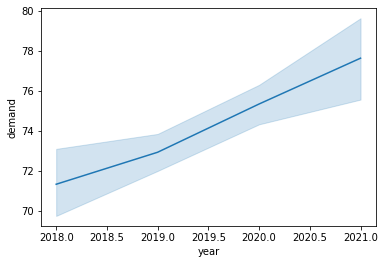

In [24]:
sns.lineplot(data = train, x='year', y='demand')

Demand has been increasing over the year

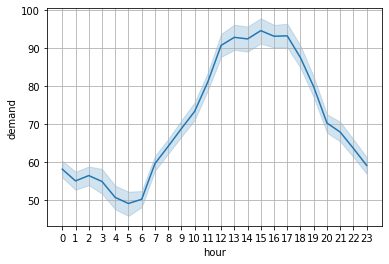

In [25]:
sns.lineplot(data = train, x='hour', y='demand')
plt.xticks(np.arange(0,24))
plt.grid()
plt.show()

Over all years, demand is very low till 5, then increases and peaks from 11 to 19 and slowly decreases.

<AxesSubplot:xlabel='TimeofDay', ylabel='demand'>

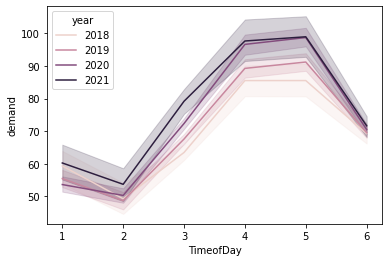

In [26]:
sns.lineplot(data = train, x = 'TimeofDay' , y ='demand',hue ='year')

<AxesSubplot:xlabel='hour_class', ylabel='demand'>

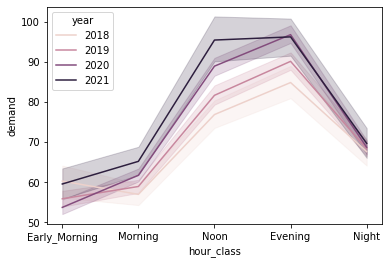

In [27]:
sns.lineplot(data = train, x = 'hour_class' , y ='demand',hue ='year')

<AxesSubplot:xlabel='Season', ylabel='demand'>

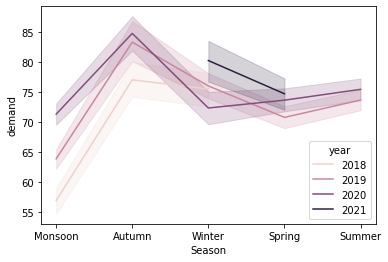

In [28]:
sns.lineplot(data = train, x = 'Season' , y ='demand',hue= 'year')

<AxesSubplot:xlabel='month', ylabel='demand'>

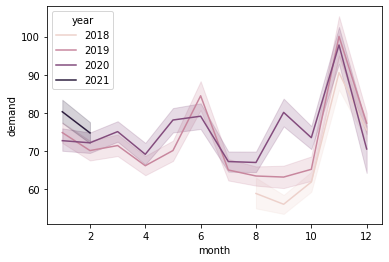

In [29]:
sns.lineplot(data = train, x ='month',hue ='year', y = 'demand')

high demand in November

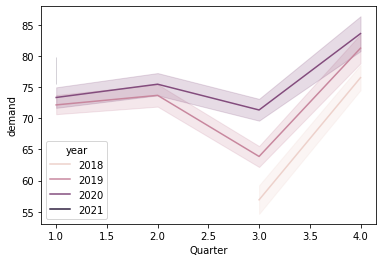

In [30]:
sns.lineplot(data = train, x ='Quarter', y = 'demand',hue ='year')
#plt.xticks([1,2,3,4])
plt.show()

Demand is steady in 1st and 2nd quarter,
demand dip in 3rd quarter,
high in 4th Quarter

<AxesSubplot:xlabel='Day_of_Year', ylabel='demand'>

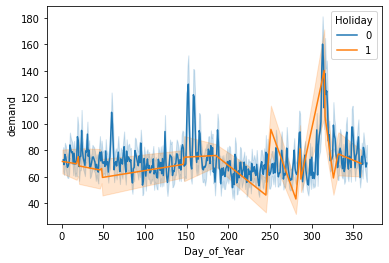

In [31]:
sns.lineplot(data = train, x ='Day_of_Year', y = 'demand',hue = 'Holiday')

<AxesSubplot:xlabel='day', ylabel='demand'>

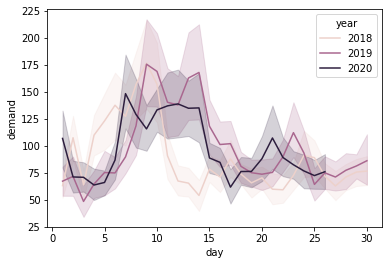

In [32]:
train_nov = train[train['month'] == 11]
sns.lineplot(data = train_nov, x ='day', y = 'demand',hue ='year')

High demand is during November 5th to 15th every year

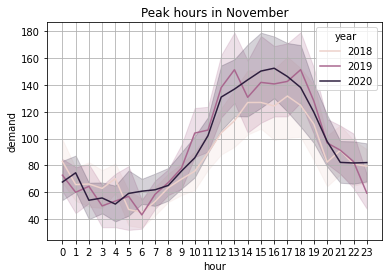

In [33]:
sns.lineplot(data = train_nov,x = 'hour', hue ='year', y = 'demand')
plt.xticks(np.arange(0,24))
plt.grid()
plt.title("Peak hours in November")
plt.show()

Increased demand for rendel cars in November are from 9 to 21 hrs.
Peak during 12 to 18 hrs

In [34]:
b4_train=train.copy()

In [35]:
b4_train.shape

(18247, 14)

#### ENCODE

In [36]:
train.dtypes

date           datetime64[ns]
hour                    int64
demand                  int64
year                    int64
month                   int64
day                     int64
hour_class           category
Week                    int32
Day_name                int64
Day_of_Year             int64
Quarter                 int64
TimeofDay               int64
Season                 object
Holiday                 int32
dtype: object

In [37]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
train ['Season'] = le.fit_transform(train[['Season']])
train['hour_class'] = le.fit_transform(train[['hour_class']])

D:\Progrmfilesdownloaded\Python310\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Progrmfilesdownloaded\Python310\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Cyclic Normalization

In [38]:
train['hour-sin'] = np.sin(train['hour']*np.pi/24)
train['hour-cos'] = np.cos(train['hour']*np.pi/24)
train.drop('hour', axis =1, inplace =True)

train['Day_of_Year-sin'] = np.sin(train['Day_of_Year']*np.pi/365)
train['Day_of_Year-cos'] = np.cos(train['Day_of_Year']*np.pi/365)
train.drop('Day_of_Year', axis =1, inplace =True)

train['day-sin'] = np.sin(train['day']*np.pi/31)
train['day-cos'] = np.cos(train['day']*np.pi/31)
train.drop('day', axis =1, inplace =True)

train['month-sin'] = np.sin(train['month']*np.pi/12)
train['month-cos'] = np.cos(train['month']*np.pi/12)
train.drop('month', axis =1, inplace =True)

train['Week-sin'] = np.sin(train['Week']*np.pi/53)
train['Week-cos'] = np.cos(train['Week']*np.pi/53)
train.drop('Week', axis =1, inplace =True)

train['Day_name-sin'] = np.sin(train['Day_name']*np.pi/7)
train['Day_name-cos'] = np.cos(train['Day_name']*np.pi/7)
train.drop('Day_name', axis =1, inplace =True)

In [39]:
train['hour_class']= train['hour_class'] +1
train['hour_class'].value_counts()

2    4441
4    4213
3    3571
5    3544
1    2478
Name: hour_class, dtype: int64

In [40]:
train['Quarter-sin'] = np.sin(train['Quarter']*np.pi/3)
train['Quarter-cos'] = np.cos(train['Quarter']*np.pi/3)
train.drop('Quarter', axis =1, inplace =True)

train['hour_class-sin'] = np.sin(train['hour_class']*np.pi/5)
train['hour_class-cos'] = np.cos(train['hour_class']*np.pi/5)
train.drop('hour_class', axis =1, inplace =True)

train['TimeofDay-sin'] = np.sin(train['TimeofDay']*np.pi/6)
train['TimeofDay-cos'] = np.cos(train['TimeofDay']*np.pi/6)
train.drop('TimeofDay', axis =1, inplace =True)

train['Season-sin'] = np.sin(train['Season']*np.pi/5)
train['Season-cos'] = np.cos(train['Season']*np.pi/5)
train.drop('Season', axis =1, inplace =True)

In [41]:
train_clean = train.copy()

Define the target Variable

In [42]:
train.drop('date',axis =1, inplace = True)
ind21 = b4_train[b4_train['year']== 2021].index
ind20 = b4_train[(b4_train['year']== 2019) & (b4_train['month']>6)].index

In [43]:
def split(dataframe):
    train = dataframe.drop(ind21)
    train = dataframe.drop(ind20)

    test1 = dataframe.loc[ind21]
    test2 = dataframe.loc[ind20]
    test = pd.concat([test1,test2])

    X_test = test.drop('demand', axis =1)
    y_test = test['demand']
    X_train = train.drop('demand', axis =1)
    y_train = train['demand']
    return(X_train,X_test,y_train,y_test)

In [44]:
X_train,X_test,y_train,y_test = split(train)

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe

vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
                          for i in range(len(X_train.columns))]
vif_data.sort_values(by = 'VIF')

,feature,VIF
1,Holiday,1.105776
13,Day_name-cos,1.267140
17,hour_class-cos,3.126860
21,Season-cos,3.326522
7,day-cos,4.932646
12,Day_name-sin,5.600933
6,day-sin,5.753963
19,TimeofDay-cos,6.472567
3,hour-cos,6.474779
16,hour_class-sin,7.671161


In [46]:
vif_data.sort_values(by = 'VIF').feature.values

array(['Holiday', 'Day_name-cos', 'hour_class-cos', 'Season-cos',
       'day-cos', 'Day_name-sin', 'day-sin', 'TimeofDay-cos', 'hour-cos',
       'hour_class-sin', 'Quarter-cos', 'Week-cos', 'Season-sin',
       'TimeofDay-sin', 'hour-sin', 'year', 'Quarter-sin', 'month-sin',
       'month-cos', 'Day_of_Year-cos', 'Week-sin', 'Day_of_Year-sin'],
      dtype=object)

In [47]:
high = ['Quarter-sin','month-cos', 'Day_of_Year-cos', 'Week-sin',
       'Day_of_Year-sin' , 'hour-cos' ,'TimeofDay-sin', 'Season-sin']

<AxesSubplot:>

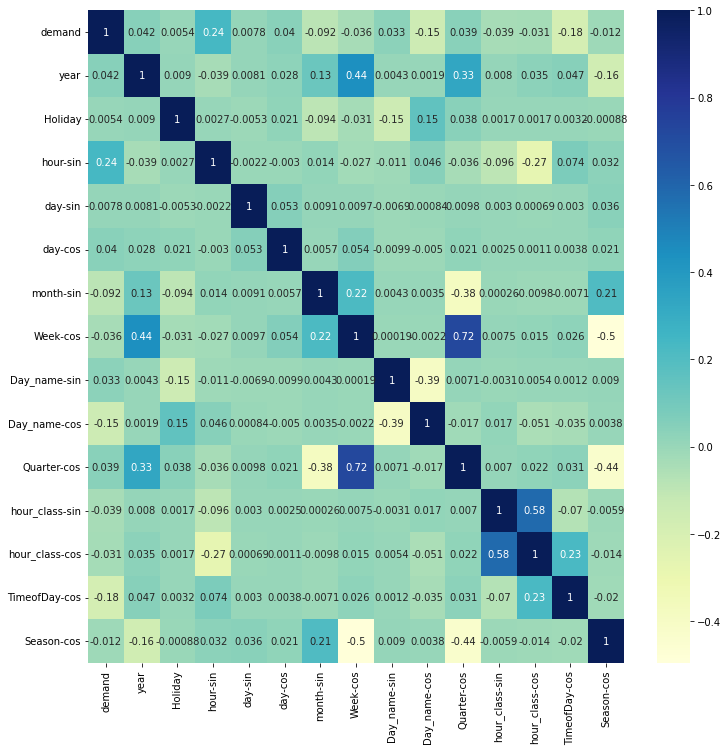

In [48]:
plt.figure(figsize = (12,12))
sns.heatmap(train_clean.drop(high,axis =1).corr(),annot=True, cmap='YlGnBu')

In [49]:
vif_data.sort_values(by = 'VIF').feature.values

array(['Holiday', 'Day_name-cos', 'hour_class-cos', 'Season-cos',
       'day-cos', 'Day_name-sin', 'day-sin', 'TimeofDay-cos', 'hour-cos',
       'hour_class-sin', 'Quarter-cos', 'Week-cos', 'Season-sin',
       'TimeofDay-sin', 'hour-sin', 'year', 'Quarter-sin', 'month-sin',
       'month-cos', 'Day_of_Year-cos', 'Week-sin', 'Day_of_Year-sin'],
      dtype=object)

In [50]:
high

['Quarter-sin',
 'month-cos',
 'Day_of_Year-cos',
 'Week-sin',
 'Day_of_Year-sin',
 'hour-cos',
 'TimeofDay-sin',
 'Season-sin']

In [51]:
#Inspect the factors for each predictor variable, if the VIF is between 5–10, multicollinearity is likely present and you should consider dropping the variable.
train_V = train.drop(high,axis =1)
train_V#select = ['Holiday', 'hour_bin-sin', 'quartor-sin', 'day_of_week-sin','timeOfDay-sin', 'day-sin', 'hour-sin', 'year', 'month-sin']
drop = high

In [52]:
train_V = train.drop(high,axis =1)
train_V

,demand,year,Holiday,hour-sin,day-sin,day-cos,month-sin,Week-cos,Day_name-sin,Day_name-cos,Quarter-cos,hour_class-sin,hour_class-cos,TimeofDay-cos,Season-cos
0,91,2018,0,0.923880,0.968077,-0.250653,0.866025,-0.375828,0.781831,-0.623490,-1.0,9.510565e-01,-0.309017,6.123234e-17,0.809017
1,21,2018,0,0.965926,0.968077,-0.250653,0.866025,-0.375828,0.781831,-0.623490,-1.0,1.224647e-16,-1.000000,6.123234e-17,0.809017
2,23,2018,0,0.991445,0.968077,-0.250653,0.866025,-0.375828,0.781831,-0.623490,-1.0,1.224647e-16,-1.000000,-5.000000e-01,0.809017
3,104,2018,0,0.965926,0.968077,-0.250653,0.866025,-0.375828,0.781831,-0.623490,-1.0,9.510565e-01,0.309017,-5.000000e-01,0.809017
4,81,2018,0,0.923880,0.968077,-0.250653,0.866025,-0.375828,0.781831,-0.623490,-1.0,9.510565e-01,0.309017,-8.660254e-01,0.809017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18242,95,2021,0,0.608761,0.299363,-0.954139,0.500000,0.889657,0.433884,-0.900969,0.5,5.877853e-01,-0.809017,-1.000000e+00,0.309017
18243,88,2021,0,0.500000,0.299363,-0.954139,0.500000,0.889657,0.433884,-0.900969,0.5,5.877853e-01,-0.809017,-1.000000e+00,0.309017
18244,39,2021,0,0.382683,0.299363,-0.954139,0.500000,0.889657,0.433884,-0.900969,0.5,5.877853e-01,-0.809017,-1.000000e+00,0.309017
18245,104,2021,0,0.258819,0.299363,-0.954139,0.500000,0.889657,0.433884,-0.900969,0.5,5.877853e-01,-0.809017,-1.000000e+00,0.309017


### Modelling

In [53]:
X_train,X_test,y_train,y_test = split(train_V)

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
lr = LinearRegression()
lr.fit(X_test,y_test)
lr.score(X_test,y_test)

0.2084892997530513

In [55]:
y_pred = lr.predict(X_test)
print("MSE:",mean_squared_error(y_pred,y_test))
print("R_square:",r2_score(y_test,y_pred))

MSE: 1529.8824809442533
R_square: 0.2084892997530513


###### Modelling Before dropping Variables

In [56]:

X_train,X_test,y_train,y_test = split(train)
lr.fit(X_test,y_test)
#lrsel=lr.fit(X_test,y_test)
lr.score(X_test,y_test)

0.2407835536711629

In [57]:
y_pred = lr.predict(X_test)
mean_squared_error(y_pred,y_test)

1467.462082471978

### Gradient Boost Regressor

In [58]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
X_train,X_test,y_train,y_test = split(train_V)
gb.fit(X_test,y_test)
gb.score(X_test,y_test)

0.42458341049269166

In [59]:
y_pred = gb.predict(X_test)
mean_squared_error(y_pred,y_test)

1112.2019692939905

### Xgboost

In [60]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=1000, max_depth=5, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgb.fit(X_train, y_train)
y_xgb = xgb.predict(X_test)
## RSME measure and R2 score
print('RMSE value : ',mean_squared_error(y_test, y_xgb))
print('R2 score : ', r2_score(y_test, y_xgb))

RMSE value :  1271.3742488293403
R2 score :  0.34223292671097794


### lightgbm

In [61]:
from lightgbm import LGBMRegressor
lgm_reg = LGBMRegressor()
lgm_reg.fit(X_train, y_train)
y_lgm_reg = lgm_reg.predict(X_test)

In [62]:
print('RMSE value : ',mean_squared_error(y_test, y_lgm_reg))
print('R2 score : ', r2_score(y_test, y_lgm_reg))

RMSE value :  1330.963429501742
R2 score :  0.3114034514351752


Test DataFrame

In [63]:
test = pd.read_csv('test_6QvDdzb.csv') 

In [64]:
test.head()

,date,hour
0,2021-03-01,0
1,2021-03-01,1
2,2021-03-01,2
3,2021-03-01,3
4,2021-03-01,5


In [65]:
test.isna().sum()

date    0
hour    0
dtype: int64

In [66]:
# Convert objective datatype of date to datetime format
test['date'] = pd.to_datetime(test['date'],errors = 'coerce') 
# decompose date variable into year, month and day
test['year'] = test['date'].dt.year
test['month'] = test['date'].dt.month
test['day'] = test['date'].dt.day

#Day convertion
test['Week'] =(test['date'].dt.isocalendar().week).astype(int)
test['Day_name'] = test['date'].dt.dayofweek
test['Day_of_Year']=test['date'].dt.dayofyear
test['Quarter'] = test['date'].dt.quarter
test['TimeofDay']=test['hour'].apply(lambda n:timeofday(n))

test['Season']=test['month'].apply(lambda s:season(s))
test['Holiday'] = test['date'].isin(holidays)
test['Holiday'] = test['Holiday'].astype(int)

test['hour_class'] = pd.cut(test['hour'],5,labels=['Early_Morning','Morning','Noon','Evening','Night'])

In [67]:
test.shape

(7650, 13)

In [68]:
test.dtypes

date           datetime64[ns]
hour                    int64
year                    int64
month                   int64
day                     int64
Week                    int32
Day_name                int64
Day_of_Year             int64
Quarter                 int64
TimeofDay               int64
Season                 object
Holiday                 int32
hour_class           category
dtype: object

### ENCODE

In [69]:
test ['Season'] = le.fit_transform(test[['Season']])
test['hour_class'] = le.fit_transform(test[['hour_class']])

D:\Progrmfilesdownloaded\Python310\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Progrmfilesdownloaded\Python310\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Cyclic Normalization

In [70]:
test['hour-sin'] = np.sin(test['hour']*np.pi/24)
test['hour-cos'] = np.cos(test['hour']*np.pi/24)
test.drop('hour', axis =1, inplace =True)

test['Day_of_Year-sin'] = np.sin(test['Day_of_Year']*np.pi/365)
test['Day_of_Year-cos'] = np.cos(test['Day_of_Year']*np.pi/365)
test.drop('Day_of_Year', axis =1, inplace =True)

test['day-sin'] = np.sin(test['day']*np.pi/31)
test['day-cos'] = np.cos(test['day']*np.pi/31)
test.drop('day', axis =1, inplace =True)

test['month-sin'] = np.sin(test['month']*np.pi/12)
test['month-cos'] = np.cos(test['month']*np.pi/12)
test.drop('month', axis =1, inplace =True)

test['Week-sin'] = np.sin(test['Week']*np.pi/53)
test['Week-cos'] = np.cos(test['Week']*np.pi/53)
test.drop('Week', axis =1, inplace =True)

test['Day_name-sin'] = np.sin(test['Day_name']*np.pi/7)
test['Day_name-cos'] = np.cos(test['Day_name']*np.pi/7)
test.drop('Day_name', axis =1, inplace =True)

In [71]:
test['hour_class']= test['hour_class'] +1
test['hour_class'].value_counts()

2    1809
4    1783
3    1590
5    1445
1    1023
Name: hour_class, dtype: int64

In [72]:
test['Quarter-sin'] = np.sin(test['Quarter']*np.pi/3)
test['Quarter-cos'] = np.cos(test['Quarter']*np.pi/3)
test.drop('Quarter', axis =1, inplace =True)

test['hour_class-sin'] = np.sin(test['hour_class']*np.pi/5)
test['hour_class-cos'] = np.cos(test['hour_class']*np.pi/5)
test.drop('hour_class', axis =1, inplace =True)

test['TimeofDay-sin'] = np.sin(test['TimeofDay']*np.pi/6)
test['TimeofDay-cos'] = np.cos(test['TimeofDay']*np.pi/6)
test.drop('TimeofDay', axis =1, inplace =True)

test['Season-sin'] = np.sin(test['Season']*np.pi/5)
test['Season-cos'] = np.cos(test['Season']*np.pi/5)
test.drop('Season', axis =1, inplace =True)

In [73]:
test.shape

(7650, 23)

In [74]:
high

['Quarter-sin',
 'month-cos',
 'Day_of_Year-cos',
 'Week-sin',
 'Day_of_Year-sin',
 'hour-cos',
 'TimeofDay-sin',
 'Season-sin']

In [75]:
test = test.drop(['Quarter-sin',
 'month-cos',
 'Day_of_Year-cos',
 'Week-sin',
 'Day_of_Year-sin',
 'hour-cos',
 'TimeofDay-sin',
 'Season-sin','date'],axis =1)
test

,year,Holiday,hour-sin,day-sin,day-cos,month-sin,Week-cos,Day_name-sin,Day_name-cos,Quarter-cos,hour_class-sin,hour_class-cos,TimeofDay-cos,Season-cos
0,2021,0,0.000000,0.101168,0.994869,0.707107,0.861044,0.0,1.0,0.5,0.587785,0.809017,-1.000000,0.309017
1,2021,0,0.130526,0.101168,0.994869,0.707107,0.861044,0.0,1.0,0.5,0.587785,0.809017,0.866025,0.309017
2,2021,0,0.258819,0.101168,0.994869,0.707107,0.861044,0.0,1.0,0.5,0.587785,0.809017,0.866025,0.309017
3,2021,0,0.382683,0.101168,0.994869,0.707107,0.861044,0.0,1.0,0.5,0.587785,0.809017,0.866025,0.309017
4,2021,0,0.608761,0.101168,0.994869,0.707107,0.861044,0.0,1.0,0.5,0.951057,-0.309017,0.500000,0.309017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7645,2022,0,0.608761,0.299363,-0.954139,0.707107,0.717507,0.0,1.0,0.5,0.587785,-0.809017,-1.000000,0.309017
7646,2022,0,0.500000,0.299363,-0.954139,0.707107,0.717507,0.0,1.0,0.5,0.587785,-0.809017,-1.000000,0.309017
7647,2022,0,0.382683,0.299363,-0.954139,0.707107,0.717507,0.0,1.0,0.5,0.587785,-0.809017,-1.000000,0.309017
7648,2022,0,0.258819,0.299363,-0.954139,0.707107,0.717507,0.0,1.0,0.5,0.587785,-0.809017,-1.000000,0.309017


In [76]:
y_test = gb.predict(test)

In [77]:
test['demand']=y_test

In [78]:
test

,year,Holiday,hour-sin,day-sin,day-cos,month-sin,Week-cos,Day_name-sin,Day_name-cos,Quarter-cos,hour_class-sin,hour_class-cos,TimeofDay-cos,Season-cos,demand
0,2021,0,0.000000,0.101168,0.994869,0.707107,0.861044,0.0,1.0,0.5,0.587785,0.809017,-1.000000,0.309017,53.754729
1,2021,0,0.130526,0.101168,0.994869,0.707107,0.861044,0.0,1.0,0.5,0.587785,0.809017,0.866025,0.309017,54.755152
2,2021,0,0.258819,0.101168,0.994869,0.707107,0.861044,0.0,1.0,0.5,0.587785,0.809017,0.866025,0.309017,55.039680
3,2021,0,0.382683,0.101168,0.994869,0.707107,0.861044,0.0,1.0,0.5,0.587785,0.809017,0.866025,0.309017,55.039680
4,2021,0,0.608761,0.101168,0.994869,0.707107,0.861044,0.0,1.0,0.5,0.951057,-0.309017,0.500000,0.309017,56.056926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7645,2022,0,0.608761,0.299363,-0.954139,0.707107,0.717507,0.0,1.0,0.5,0.587785,-0.809017,-1.000000,0.309017,70.503933
7646,2022,0,0.500000,0.299363,-0.954139,0.707107,0.717507,0.0,1.0,0.5,0.587785,-0.809017,-1.000000,0.309017,62.969695
7647,2022,0,0.382683,0.299363,-0.954139,0.707107,0.717507,0.0,1.0,0.5,0.587785,-0.809017,-1.000000,0.309017,59.075107
7648,2022,0,0.258819,0.299363,-0.954139,0.707107,0.717507,0.0,1.0,0.5,0.587785,-0.809017,-1.000000,0.309017,59.075107


In [79]:
test1=pd.read_csv('test_6QvDdzb.csv')
test1

,date,hour
0,2021-03-01,0
1,2021-03-01,1
2,2021-03-01,2
3,2021-03-01,3
4,2021-03-01,5
...,...,...
7645,2022-03-28,19
7646,2022-03-28,20
7647,2022-03-28,21
7648,2022-03-28,22


In [83]:

test1['demand'] = y_test.round()

In [84]:
test1

,date,hour,demand
0,2021-03-01,0,54.0
1,2021-03-01,1,55.0
2,2021-03-01,2,55.0
3,2021-03-01,3,55.0
4,2021-03-01,5,56.0
...,...,...,...
7645,2022-03-28,19,71.0
7646,2022-03-28,20,63.0
7647,2022-03-28,21,59.0
7648,2022-03-28,22,59.0


In [82]:
test.to_csv("Demand_Predicted.csv")